Importing dependencies

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading a file and renaming columns for better readability

In [9]:


columns = [
    "city1",                            # candidate's city name
    "state1",                           # candidate's state code
    "city2",                            # candidate's city name
    "state2",                           # candidate's state code
    "age",                              # candidate's age
    "has_finished_high_school",         # candidate has finished high school
    "school_type",                      # candidate's school type (1 = public or 2 = private)
    "family_monthly_income",            # candidate's family monthly income  
    "family_people_count",              # number of people who lives with the candidate in the same house
    "left_elementary_school",           # "Q040 you left elementary school?"
    "left_high_school",                 # "have you left high school?"
    "work_start_age",                   # "how old were you when started working?"
    "work_reason__help_parents",        # "I started working to help my parents"
    "work_reason__support_family",      # "I started working to support my family"
    "work_reason__be_independent",      # "I started working to be independent"
    "work_reason__gain_experience",     # "I started working to gain experience"
    "work_reason__afford_education",    # "I started working to afford my education"
    "left_school_age",                  # "how old were you when left the school?"
]

df = pd.read_csv("data-prepared/enem_2013_AC.csv", sep=";", names=columns)
df.head()

,city1,state1,city2,state2,age,has_finished_high_school,school_type,family_monthly_income,family_people_count,left_elementary_school,left_high_school,work_start_age,work_reason__help_parents,work_reason__support_family,work_reason__be_independent,work_reason__gain_experience,work_reason__afford_education,left_school_age
0,NO_MUNICIPIO_RESIDENCIA,UF_RESIDENCIA,NO_MUNICIPIO_ESC,UF_ESC,IDADE,ST_CONCLUSAO,TP_ESCOLA,Q003,Q004,Q031,Q034,Q040,Q042,Q043,Q044,Q045,Q046,Q076
1,RIO BRANCO,AC,NaN,NaN,26,1,NaN,C,4,A,A,15,4,4,1,0,1,NaN
2,RIO BRANCO,AC,NaN,NaN,29,1,NaN,C,3,A,A,18,5,5,5,3,3,NaN
3,RIO BRANCO,AC,NaN,NaN,27,3,NaN,E,4,E,E,19,0,5,5,5,5,NaN
4,CRUZEIRO DO SUL,AC,NaN,NaN,18,3,NaN,C,7,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The city and state columns are important because I'll compare regions by using such values, let's see if all rows have missing values

In [10]:
city1_missing_values_rate = df['city1'].isnull().sum() / df.shape[0]
state1_missing_values_rate = df['state1'].isnull().sum() / df.shape[0]
print(f"Rows missing city: {city1_missing_values_rate}")
print(f"Rows missing state: {state1_missing_values_rate}")

Rows missing city: 0.0
Rows missing state: 0.0


Great! We have no missing values for such key columns.

Let's expand this analysis for all the columns.

In [11]:
df.isnull().sum() / df.shape[0]

city1                            0.000000
state1                           0.000000
city2                            0.842004
state2                           0.842004
age                              0.000000
has_finished_high_school         0.000000
school_type                      0.843324
family_monthly_income            0.000000
family_people_count              0.000000
left_elementary_school           0.000000
left_high_school                 0.000000
work_start_age                   0.370228
work_reason__help_parents        0.370228
work_reason__support_family      0.370228
work_reason__be_independent      0.370228
work_reason__gain_experience     0.370228
work_reason__afford_education    0.370228
left_school_age                  0.999983
dtype: float64

Unfortunately, I can notice ```left_school_age``` and ```school_type``` are not helpful due to their high missing value rates. I'll consider avoid them in the following analysis.



Now, let's transform ```family_monthly_income``` from categorical into a numeric column by using the values from the answer options: 

|Monthly income|Numerical value|
|---|---|
|No income|R$ 0|
|Up to a minimum salary|R$ 678|
|Up to 1,5 minimum salaries|R$ 847|
|Up to 2 salaries|R$ 1017|
|Up to 2,5 salaries|R$ 1356|
|Up to 3 salaries|R$ 1695|
|Up to 4 salaries|R$ 2034|
|Up to 5 salaries|R$ 2712|
|Up to 6 salaries|R$ 3390|
|Up to 7 salaries|R$ 4068|
|Up to 8 salaries|R$ 4746|
|Up to 9 salaries|R$ 5424|
|Up to 10 salaries|R$ 6102|
|Up to 12 salaries|R$ 6780|
|Up to 15 salaries|R$ 8136|
|Up to 20 salaries|R$ 10170|
|More than 20 salaries|R$ 13560|

In [12]:
def monthly_income(choice):
    if choice == "A":
        return 0
    if choice == "B":
        return 678
    if choice == "C":
        return 847
    if choice == "D":
        return 1017
    if choice == "E":
        return 1356
    if choice == "F":
        return 1695
    if choice == "G":
        return 2034
    if choice == "H":
        return 2712
    if choice == "I":
        return 3390
    if choice == "J":
        return 4068
    if choice == "K":
        return 4746
    if choice == "L":
        return 5424
    if choice == "M":
        return 6102
    if choice == "N":
        return 6780
    if choice == "O":
        return 8136
    if choice == "P":
        return 10170
    if choice == "Q":
        return 13560

df["family_monthly_income_value"] = df.apply(lambda row: monthly_income(row.family_monthly_income), axis=1)
df[["city1", "family_monthly_income_value"]].head()

,city1,family_monthly_income_value
0,NO_MUNICIPIO_RESIDENCIA,NaN
1,RIO BRANCO,847.0
2,RIO BRANCO,847.0
3,RIO BRANCO,1356.0
4,CRUZEIRO DO SUL,847.0


Let's see the family monthly income distribution

<AxesSubplot:>

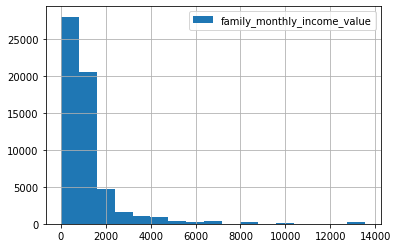

In [13]:
df['family_monthly_income_value'].hist(bins=17, legend=True)

Let's join ```left_elementary_school``` and ```left_high_school``` into a new column, given both indicate the person has left the school in the past

In [14]:
df["left_school"] = df.apply(lambda row: False if (row.left_elementary_school == "A" or row.left_high_school == "A") else True, axis=1)
df[["city1", "left_school"]].head()

,city1,left_school
0,NO_MUNICIPIO_RESIDENCIA,True
1,RIO BRANCO,False
2,RIO BRANCO,False
3,RIO BRANCO,True
4,CRUZEIRO DO SUL,False


Let's see the dropout comparison

<AxesSubplot:ylabel='city1'>

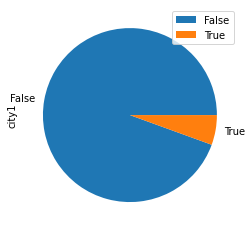

In [15]:
df.groupby(["left_school"]).count().plot.pie(y="city1")

In [16]:
df["left_school"].sum() / df.shape[0]

0.055435602166015494

We found 5,54% of the candidates have left school at least once in the past.

Let's create a function to wrap all this data manipulation we have so far. It'll be helpful given we have a data file for each state.

In [19]:
def prepare_enem_dataset(filename):
    columns = [
        "city1",                            # candidate's city name
        "state1",                           # candidate's state code
        "city2",                            # candidate's city name
        "state2",                           # candidate's state code
        "age",                              # candidate's age
        "has_finished_high_school",         # candidate has finished high school
        "school_type",                      # candidate's school type (1 = public or 2 = private)
        "family_monthly_income",            # candidate's family monthly income  
        "family_people_count",              # number of people who lives with the candidate in the same house
        "left_elementary_school",           # "Q040 you left elementary school?"
        "left_high_school",                 # "have you left high school?"
        "work_start_age",                   # "how old were you when started working?"
        "work_reason__help_parents",        # "I started working to help my parents"
        "work_reason__support_family",      # "I started working to support my family"
        "work_reason__be_independent",      # "I started working to be independent"
        "work_reason__gain_experience",     # "I started working to gain experience"
        "work_reason__afford_education",    # "I started working to afford my education"
        "left_school_age",                  # "how old were you when left the school?"
    ]

    df = pd.read_csv(filename, sep=";", names=columns)

    def monthly_income(choice):
        if choice == "A":
            return 0
        if choice == "B":
            return 678
        if choice == "C":
            return 847
        if choice == "D":
            return 1017
        if choice == "E":
            return 1356
        if choice == "F":
            return 1695
        if choice == "G":
            return 2034
        if choice == "H":
            return 2712
        if choice == "I":
            return 3390
        if choice == "J":
            return 4068
        if choice == "K":
            return 4746
        if choice == "L":
            return 5424
        if choice == "M":
            return 6102
        if choice == "N":
            return 6780
        if choice == "O":
            return 8136
        if choice == "P":
            return 10170
        if choice == "Q":
            return 13560

    df["family_monthly_income_value"] = df.apply(lambda row: monthly_income(row.family_monthly_income), axis=1)
    df["left_school"] = df.apply(lambda row: False if (row.left_elementary_school == "A" or row.left_high_school == "A") else True, axis=1)

    return df[["city1", "state1", "age", "family_people_count", "work_start_age", "family_monthly_income_value", "left_school"]]

prepare_enem_dataset("data-prepared/enem_2013_TO.csv")

,city1,state1,age,family_people_count,work_start_age,family_monthly_income_value,left_school
0,NO_MUNICIPIO_RESIDENCIA,UF_RESIDENCIA,IDADE,Q004,Q040,NaN,True
1,PALMAS,TO,18,4,15,678.0,False
2,ARAGUAINA,TO,46,3,15,2712.0,False
3,PALMAS,TO,15,5,NaN,678.0,False
4,ARAGUAINA,TO,26,3,21,1356.0,False
...,...,...,...,...,...,...,...
57517,FATIMA,TO,22.0,4,18.0,847.0,False
57518,PIRAQUE,TO,29.0,3,18.0,678.0,False
57519,TAGUATINGA,TO,19.0,2,15.0,678.0,False
57520,ARAGUAINA,TO,27.0,2,16.0,678.0,False


This function will be defined in an external file for future use in other files.